In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import bnl
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Build the dataframe

In [45]:
for tid in bnl.fio.salami_tids():
    try:
        bnl.prf.compare_bmetrics_on_ests(tid)
    except:
        print(f"Error in {tid}")
        continue

/Users/xi/miniforge3/envs/py39/lib/python3.9/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Error in 11


/Users/xi/miniforge3/envs/py39/lib/python3.9/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Error in 1568
Error in 679
Error in 710
Error in 711
Error in 714
Error in 716
Error in 717
Error in 719
Error in 720
Error in 724


In [52]:
# load all nc files from ./est_boundary_metrics, join them alone tid, and save the result as nc file
def load_and_join_nc_files():
    import glob
    import xarray as xr

    # Get all nc files in the directory
    nc_files = glob.glob("./est_boundary_metrics/*.nc")

    # Load all nc files into a list of DataFrames
    dataframes = [xr.open_dataset(nc_file) for nc_file in nc_files]

    # Concatenate all DataFrames along the 'tid' dimension
    # Ensure 'tid' is string type in each dataset before concatenation
    for ds in dataframes:
        if 'tid' in ds.coords and ds['tid'].dtype.kind in {'i', 'u'}:
            ds['tid'] = ds['tid'].astype(str)
    combined_df = xr.concat(dataframes, dim="tid")

    return combined_df

In [53]:
da = load_and_join_nc_files()

In [ ]:
df = da.to_dataframe(name='value').reset_index()
df_pivoted = df.pivot(index=['tid', 'window', "perf"], columns=["metric",  "mono_casting", "depth"], values='value')
df_pivoted.columns = [f'{metric}_{perf}' for metric, perf in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

<xarray.Dataset> Size: 2MB
Dimensions:                        (tid: 1348, perf: 3, metric: 4, window: 2,
                                    mono_casting: 3, depth: 2)
Coordinates:
  * metric                         (metric) object 32B 'hr' 'sr' 'b' 't'
  * mono_casting                   (mono_casting) object 24B 'naive' ... 'bsc'
  * perf                           (perf) object 24B 'p' 'r' 'f'
  * depth                          (depth) object 16B 'default' '3'
  * window                         (window) object 16B '0.5' '3'
  * tid                            (tid) object 11kB '429' '18' ... '628' '768'
Data variables:
    __xarray_dataarray_variable__  (tid, perf, metric, window, mono_casting, depth) float64 2MB ...

## Just load:


In [5]:
df = pd.read_feather("est_boundary_metrics.feather").fillna(0)

In [3]:
df

,tid,window,perf,hr_naive_default,hr_naive_3,hr_absorb_default,hr_absorb_3,hr_bsc_default,hr_bsc_3,sr_naive_default,...,b_absorb_default,b_absorb_3,b_bsc_default,b_bsc_3,t_naive_default,t_naive_3,t_absorb_default,t_absorb_3,t_bsc_default,t_bsc_3
0,10,0.5,f,0.262295,0.262295,0.262295,0.262295,0.206897,0.206897,0.684211,...,0.387409,0.387409,0.206897,0.206897,0.476207,0.432805,0.432805,0.432805,0.188618,0.188394
1,10,0.5,p,0.222222,0.222222,0.222222,0.222222,0.750000,0.750000,0.565217,...,0.350877,0.350877,0.750000,0.750000,0.391918,0.382266,0.382266,0.382266,0.223825,0.224021
2,10,0.5,r,0.320000,0.320000,0.320000,0.320000,0.120000,0.120000,0.866667,...,0.432432,0.432432,0.120000,0.120000,0.606687,0.498743,0.498743,0.498743,0.162982,0.162545
3,10,3,f,0.206897,0.206897,0.206897,0.206897,0.206897,0.206897,NaN,...,0.206897,0.206897,0.206897,0.206897,0.188394,0.188394,0.188394,0.188394,0.188182,0.187981
4,10,3,p,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,NaN,...,0.750000,0.750000,0.750000,0.750000,0.224021,0.224021,0.224021,0.224021,0.224226,0.224439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8083,999,0.5,p,0.121212,0.121212,0.121212,0.121212,0.269231,0.269231,0.538462,...,0.201681,0.201681,0.357827,0.357827,0.686705,0.735215,0.735215,0.735215,0.754214,0.754214
8084,999,0.5,r,0.181818,0.181818,0.181818,0.181818,0.159091,0.159091,0.933333,...,0.296296,0.296296,0.265403,0.265403,0.746260,0.639061,0.639061,0.639061,0.683614,0.683614
8085,999,3,f,0.457143,0.457143,0.457143,0.457143,0.457143,0.457143,0.661765,...,0.540744,0.540744,0.540744,0.540744,0.717181,0.717181,0.717181,0.717181,0.717181,0.717181
8086,999,3,p,0.615385,0.615385,0.615385,0.615385,0.615385,0.615385,0.555556,...,0.583942,0.583942,0.583942,0.583942,0.754214,0.754214,0.754214,0.754214,0.754214,0.754214


(-0.05, 1.05)

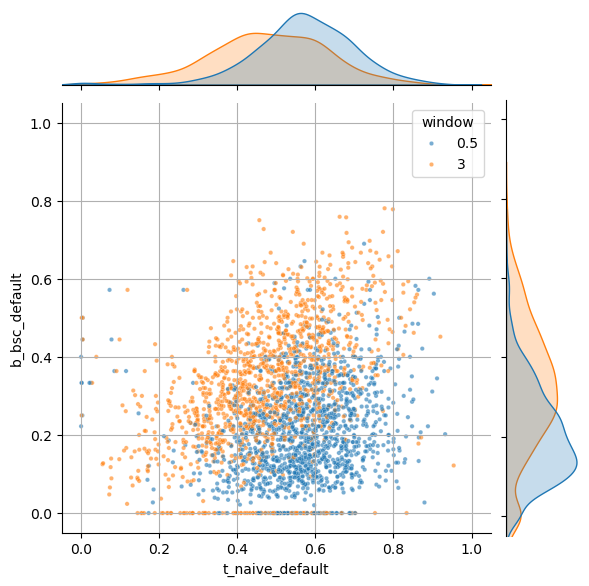

In [87]:

sns.jointplot(
    data=df.query('perf == "f"'), 
    x="t_naive_default", y="b_bsc_default", 
    hue="window", 
    # kind='kde')
    s=10, alpha=0.6, marker='o')
plt.grid(True)
plt.gca().set_aspect('equal')
plt.gca().set_xlim(-0.05, 1.05)
plt.gca().set_ylim(-0.05, 1.05)

In [ ]:
df.query('perf == "f"')

,tid,window,perf,hr_naive_default,hr_naive_3,hr_absorb_default,hr_absorb_3,hr_bsc_default,hr_bsc_3,sr_naive_default,...,b_absorb_default,b_absorb_3,b_bsc_default,b_bsc_3,t_naive_default,t_naive_3,t_absorb_default,t_absorb_3,t_bsc_default,t_bsc_3
0,10,0.5,f,0.262295,0.262295,0.262295,0.262295,0.206897,0.206897,0.684211,...,0.387409,0.387409,0.206897,0.206897,0.476207,0.432805,0.432805,0.432805,0.188618,0.188394
6,100,0.5,f,0.222222,0.222222,0.222222,0.222222,0.272727,0.272727,0.888889,...,0.363636,0.363636,0.428571,0.428571,0.452356,0.479907,0.479907,0.479907,0.403539,0.403539
12,1000,0.5,f,0.135135,0.135135,0.135135,0.135135,0.100000,0.100000,0.333333,...,0.000000,0.000000,0.181818,0.181818,0.578091,0.636845,0.636845,0.636845,0.511325,0.511193
18,1002,0.5,f,0.237624,0.237624,0.237624,0.237624,0.177778,0.177778,0.772727,...,0.365366,0.365366,0.177778,0.177778,0.566862,0.525989,0.525989,0.525989,0.469778,0.469535
24,1003,0.5,f,0.297872,0.297872,0.297872,0.297872,0.120000,0.120000,0.462810,...,0.334328,0.334328,0.120000,0.120000,0.557488,0.556728,0.556728,0.556728,0.412091,0.411862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8058,995,0.5,f,0.151659,0.151659,0.151659,0.151659,0.026846,0.026846,0.722892,...,0.232277,0.232277,0.026846,0.026846,0.434568,0.451928,0.451928,0.451928,0.197793,0.198399
8064,996,0.5,f,0.300000,0.300000,0.300000,0.300000,0.105263,0.105263,0.589474,...,0.410526,0.410526,0.105263,0.105263,0.564695,0.576125,0.576125,0.576125,0.380661,0.380080
8070,997,0.5,f,0.215054,0.215054,0.215054,0.215054,0.139535,0.139535,0.419355,...,0.286396,0.286396,0.139535,0.139535,0.583348,0.567783,0.567783,0.567783,0.459079,0.458540
8076,998,0.5,f,0.177419,0.177419,0.177419,0.177419,0.078431,0.078431,0.424242,...,0.218905,0.218905,0.078431,0.078431,0.378442,0.353313,0.353313,0.353313,0.168023,0.167960


In [2]:
refs, ests = bnl.fio.salami_annos(384)

(<Figure size 500x490 with 11 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: xlabel='Time (s)'>],
       dtype=object))

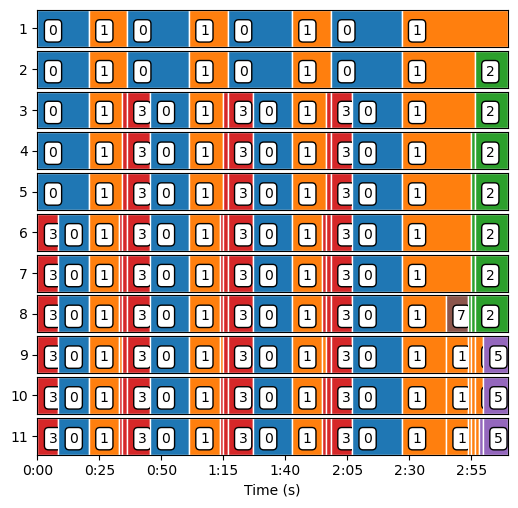

In [30]:
est = bnl.mc.force_mono_B(ests['mu1_gamma9'], absorb_window=1)
bnl.mc.squash_levels(est, depth=None).plot()

(<Figure size 500x170 with 3 Axes>,
 array([<Axes: >, <Axes: >, <Axes: xlabel='Time (s)'>], dtype=object))

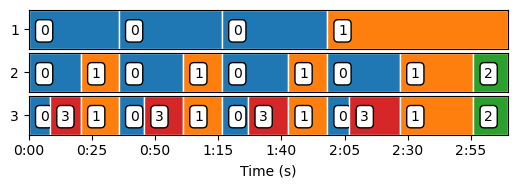

In [27]:
bsc_est = est.decode(sr=5, bw=1, depth=3)
bsc_est.plot()

(<Figure size 500x170 with 3 Axes>,
 array([<Axes: >, <Axes: >, <Axes: xlabel='Time (s)'>], dtype=object))

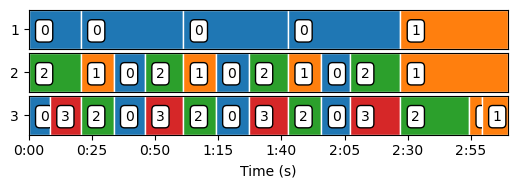

In [28]:
bsc_est = ests['mu1_gamma9'].decode(sr=5, bw=1, depth=3)
bsc_est.plot()